In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False

data = pd.read_csv('diabetes_data_upload.csv')
# 查看数据基本信息
print("\n数据类型信息：")
data.info()
data.head()


数据类型信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class            

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [2]:
# 数据清洗
class DataCleaner:
    """数据清洗类，用于处理分类特征编码"""
    def __init__(self, data):
        self.data = data.copy()
    
    def encode_binary_features(self, feature_cols):
        """编码二分类特征（Yes->1, No->0）"""
        try:
            for col in feature_cols:
                if col not in self.data.columns:
                    raise ValueError(f"特征列 {col} 不在数据集中")
                self.data[col] = self.data[col].map({'Yes': 1, 'No': 0})
            return self.data
        except Exception as e:
            print(f"编码二分类特征时出错：{str(e)}")
            raise
    
    def encode_gender(self, gender_col='Gender'):
        """编码性别特征（Male->1, Female->0）"""
        try:
            if gender_col not in self.data.columns:
                raise ValueError(f"性别列 {gender_col} 不在数据集中")
            self.data[gender_col] = self.data[gender_col].map({'Male': 1, 'Female': 0})
            return self.data
        except Exception as e:
            print(f"编码性别特征时出错：{str(e)}")
            raise
    
    def encode_target(self, target_col='class'):
        """编码目标变量（Positive->1, Negative->0）"""
        try:
            if target_col not in self.data.columns:
                raise ValueError(f"目标列 {target_col} 不在数据集中")
            self.data[target_col] = self.data[target_col].map({'Positive': 1, 'Negative': 0})
            return self.data
        except Exception as e:
            print(f"编码目标变量时出错：{str(e)}")
            raise
    
    def clean(self):
        """完整清洗流程"""
        # 定义二分类特征列
        binary_features = [col for col in self.data.columns 
                          if col not in ['Age', 'Gender', 'class']]
        # 执行编码
        self.data = self.encode_binary_features(binary_features)
        self.data = self.encode_gender()
        self.data = self.encode_target()
        # 验证编码结果
        print("数据清洗后的数据类型：")
        self.data.info()
        print("\n数据清洗后前5行：")
        print(self.data.head())
        return self.data

# 执行清洗
cleaner = DataCleaner(data)
clean_data = cleaner.clean()

数据清洗后的数据类型：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  class               520 non-null

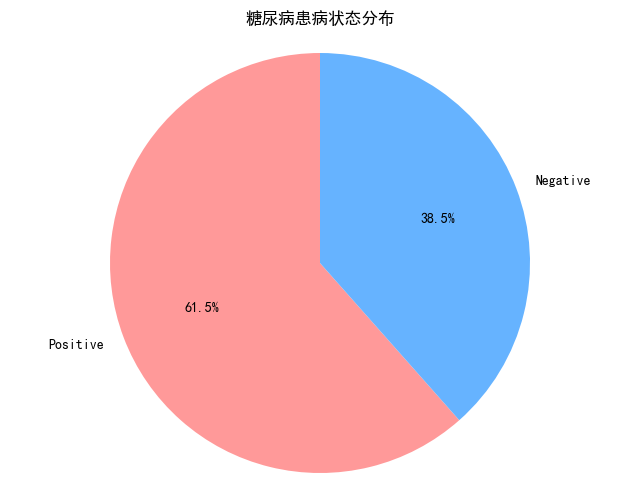

In [3]:
# 绘制目标变量分布饼图
target_counts = clean_data['class'].value_counts()
labels = ['Positive' if x == 1 else 'Negative' for x in target_counts.index]
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('糖尿病患病状态分布')
plt.axis('equal')
plt.show()

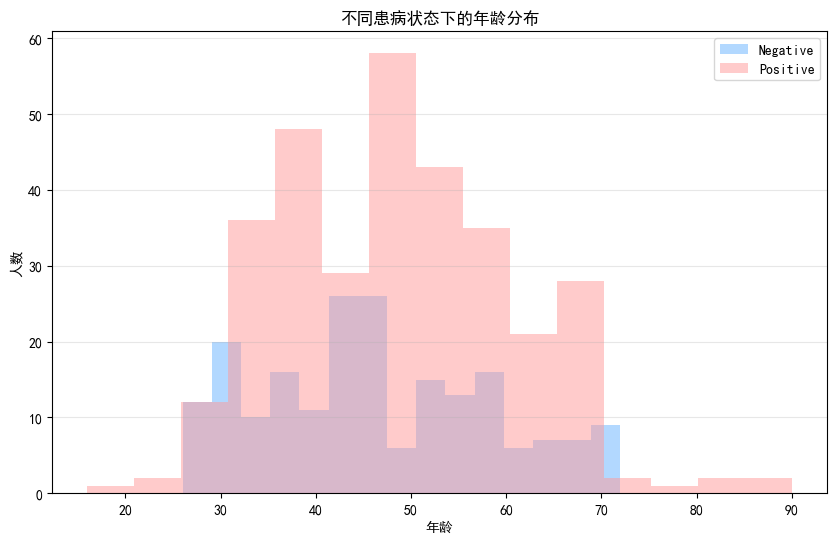

In [4]:
# 绘制不同患病状态下的年龄分布直方图
plt.figure(figsize=(10, 6))
for target, color, label in zip([0, 1], ['#66b3ff', '#ff9999'], ['Negative', 'Positive']):
    age_data = clean_data[clean_data['class'] == target]['Age']
    plt.hist(age_data, alpha=0.5, color=color, label=label, bins=15)
plt.xlabel('年龄')
plt.ylabel('人数')
plt.title('不同患病状态下的年龄分布')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

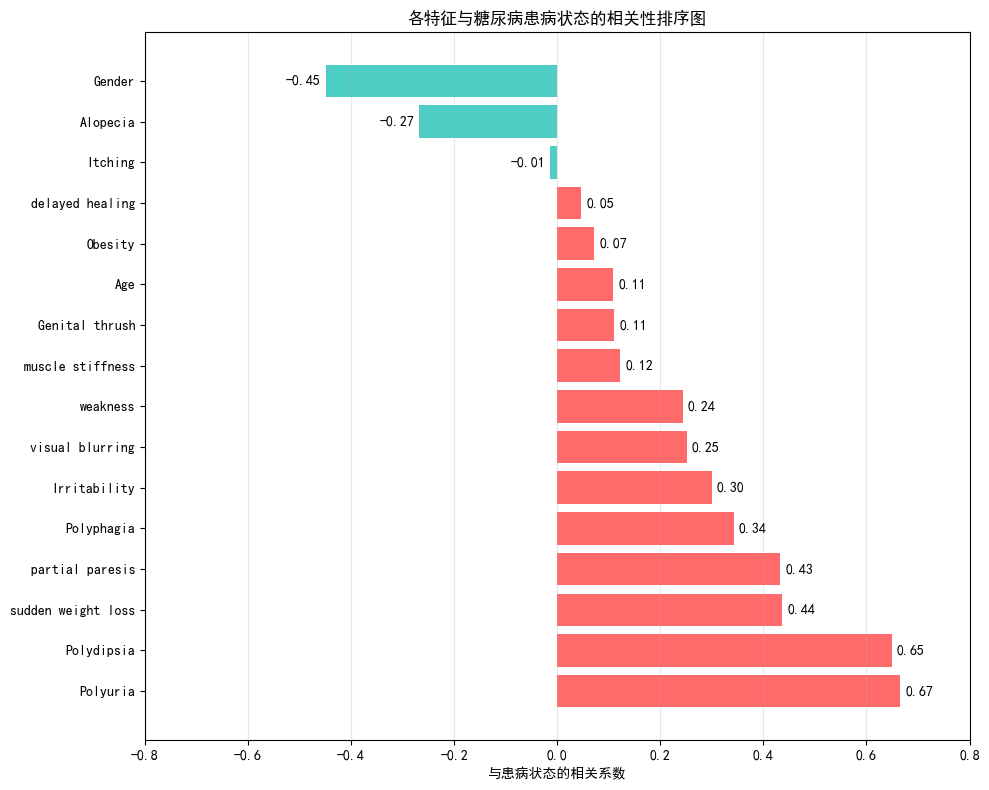

In [5]:
# 计算各特征与目标变量的相关系数并排序
corr = clean_data.corr()
target_corr = corr['class'].sort_values(ascending=False)
# 排除目标变量自身的相关性
target_corr = target_corr.drop('class')

# 绘制水平柱状图
plt.figure(figsize=(10, 8))
colors = ['#ff6b6b' if x > 0 else '#4ecdc4' for x in target_corr.values]
bars = plt.barh(range(len(target_corr)), target_corr.values, color=colors)
plt.yticks(range(len(target_corr)), target_corr.index)
plt.xlabel('与患病状态的相关系数')
plt.title('各特征与糖尿病患病状态的相关性排序图')
plt.xlim(-0.8, 0.8)  # 固定x轴范围，使相关性差异更直观
plt.grid(axis='x', alpha=0.3)

# 在柱状图上添加相关系数数值
for i, (bar, val) in enumerate(zip(bars, target_corr.values)):
    plt.text(val + 0.01 if val > 0 else val - 0.01, bar.get_y() + bar.get_height()/2,
             f'{val:.2f}', ha='left' if val > 0 else 'right', va='center')

plt.tight_layout()
plt.show()

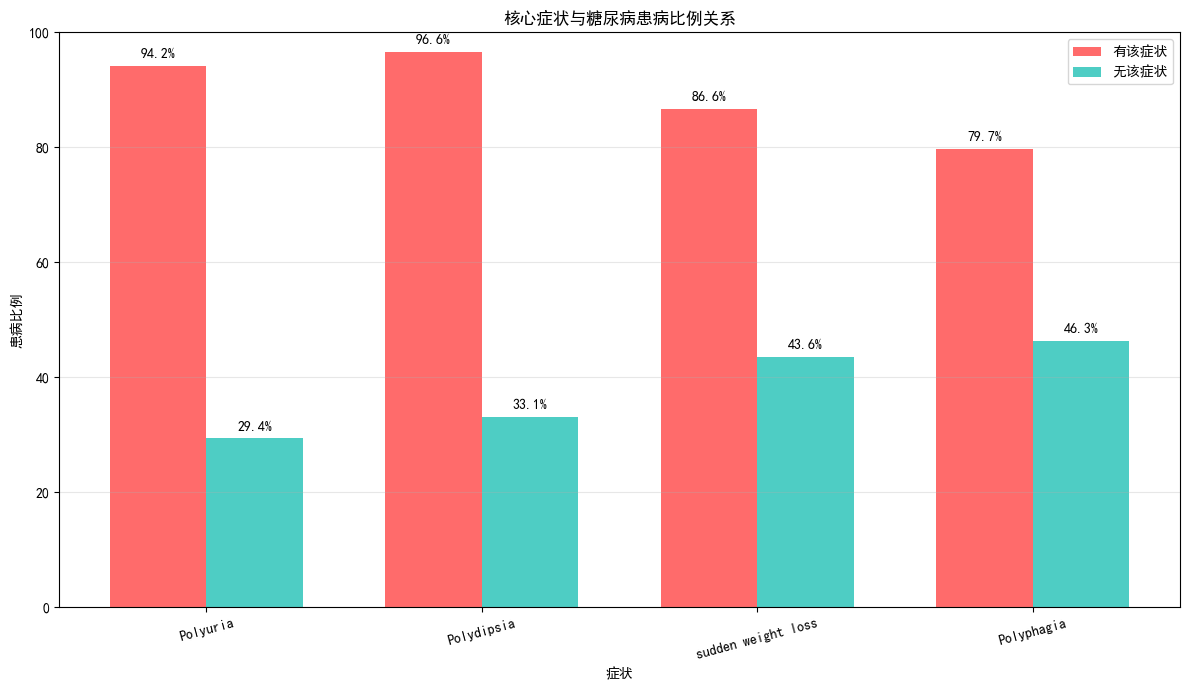

In [6]:
# 选择4个核心症状
core_symptoms = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'Polyphagia']
symptom_diabetes_ratio = []

# 计算每个症状存在/不存在时的患病比例
for symptom in core_symptoms:
    # 症状存在时的患病比例
    has_symptom = clean_data[clean_data[symptom] == 1]['class'].mean() * 100
    # 症状不存在时的患病比例
    no_symptom = clean_data[clean_data[symptom] == 0]['class'].mean() * 100
    symptom_diabetes_ratio.append([has_symptom, no_symptom])

# 转换为DataFrame便于绘图
symptom_df = pd.DataFrame(symptom_diabetes_ratio, 
                          index=core_symptoms, 
                          columns=['有该症状', '无该症状'])

# 绘制分组柱状图
plt.figure(figsize=(12, 7))
x = np.arange(len(core_symptoms))
width = 0.35

plt.bar(x - width/2, symptom_df['有该症状'], width, label='有该症状', color='#ff6b6b')
plt.bar(x + width/2, symptom_df['无该症状'], width, label='无该症状', color='#4ecdc4')

plt.xlabel('症状')
plt.ylabel('患病比例')
plt.title('核心症状与糖尿病患病比例关系')
plt.xticks(x, core_symptoms, rotation=15)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 100)

# 在柱状图上添加数值标签
for i, v in enumerate(symptom_df['有该症状']):
    plt.text(i - width/2, v + 1, f'{v:.1f}%', ha='center', va='bottom')
for i, v in enumerate(symptom_df['无该症状']):
    plt.text(i + width/2, v + 1, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [7]:
# 预处理
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

class DataPreprocessor:
    """数据预处理类，用于划分数据集和特征标准化"""
    def __init__(self, data, target_col='class'):
        self.data = data
        self.target_col = target_col
        self.X = self.data.drop(columns=[target_col])
        self.y = self.data[target_col]
        self.scaler = StandardScaler()
    
    def split_data(self, test_size=0.3, random_state=42):
        """划分训练集和测试集"""
        try:
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                self.X, self.y, test_size=test_size, random_state=random_state, stratify=self.y
            )
            print(f"训练集样本数：{self.X_train.shape[0]}（{len(self.y_train[self.y_train==1])}个患病样本）")
            print(f"测试集样本数：{self.X_test.shape[0]}（{len(self.y_test[self.y_test==1])}个患病样本）")
            return self.X_train, self.X_test, self.y_train, self.y_test
        except Exception as e:
            print(f"划分数据集时出错：{str(e)}")
            raise
    
    def standardize_features(self):
        """对“Age”进行特征标准化"""
        try:
            if self.X_train is None or self.X_test is None:
                raise ValueError("请先调用split_data划分数据集")

            X_train_scaled = self.X_train.copy()
            X_test_scaled = self.X_test.copy()
            # 仅对Age列做标准化
            if 'Age' in X_train_scaled.columns:
                X_train_scaled['Age'] = self.scaler.fit_transform(X_train_scaled[['Age']])
                X_test_scaled['Age'] = self.scaler.transform(X_test_scaled[['Age']])
                print("Age特征标准化完成，其余特征保持原始值")
            else:
                raise KeyError("数据集中未找到'Age'列，无法进行标准化")
            return X_train_scaled, X_test_scaled
        except Exception as e:
            print(f"特征标准化时出错：{str(e)}")
            raise
    

# 实例化数据预处理类并执行预处理
preprocessor = DataPreprocessor(clean_data)
X_train, X_test, y_train, y_test = preprocessor.split_data()
X_train_scaled, X_test_scaled = preprocessor.standardize_features()

# 查看预处理后的数据
print("\n标准化后的训练集前5行：")
X_train_scaled.head()

训练集样本数：364（224个患病样本）
测试集样本数：156（96个患病样本）
Age特征标准化完成，其余特征保持原始值

标准化后的训练集前5行：


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
497,-0.069884,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
233,0.179506,1,0,0,0,1,0,0,0,1,0,1,1,1,1,0
116,-1.483094,0,1,1,1,0,1,0,0,0,1,0,1,1,0,0
365,-0.236144,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0
276,-1.483094,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# 逻辑回归
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

class LogisticRegressionModel:
    """逻辑回归模型类，包含模型训练、调参和评估"""
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.model = LogisticRegression(random_state=random_state, max_iter=1000)
        self.best_model = None
        self.best_params = None
        self.cv_results = None
        self.y_pred = None
        self.y_pred_proba = None
    
    def hyperparameter_tuning(self, X_train, y_train, cv=5):
        """网格搜索调参"""
        try:
            # 定义参数网格
            param_grid = {
                'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # 正则化强度
                'penalty': ['l1', 'l2'],  # 正则化方式
                'solver': ['liblinear','lbfgs']   
            }
            print(f"参数网格：{param_grid}")
            # 网格搜索
            grid_search = GridSearchCV(
                estimator=self.model,
                param_grid=param_grid,
                cv=5,
                scoring=['accuracy', 'f1', 'roc_auc'],
                refit='accuracy',  # 以准确率为基准选择最佳模型
                n_jobs=-1,
                verbose=1
            )
            grid_search.fit(X_train, y_train)
            # 保存最佳模型和结果
            self.best_model = grid_search.best_estimator_
            self.best_params = grid_search.best_params_
            self.cv_results = pd.DataFrame(grid_search.cv_results_)
            print(f"\n逻辑回归最佳参数：{self.best_params}")
            print(f"逻辑回归交叉验证最佳准确率：{grid_search.best_score_:.4f}")
            # 输出交叉验证的各项指标均值
            print("\n交叉验证各项指标均值（最佳参数）：")
            for score in ['mean_test_accuracy', 'mean_test_f1', 'mean_test_roc_auc']:
                print(f"{score.replace('mean_test_', '')}: {grid_search.cv_results_[score][grid_search.best_index_]:.4f}")
            return self.best_model
        except Exception as e:
            print(f"逻辑回归调参时出错：{str(e)}")
            raise
    
    def train(self, X_train, y_train, tune=True, cv=5):
        """训练模型"""
        if tune:
            return self.hyperparameter_tuning(X_train, y_train, cv=cv)
        else:
            self.model.fit(X_train, y_train)
            self.best_model = self.model
            print("逻辑回归模型训练完成")
            return self.best_model
    
    def predict(self, X_test):
        """模型预测"""
        try:
            if self.best_model is None:
                raise ValueError("模型尚未训练")
            self.y_pred = self.best_model.predict(X_test)
            self.y_pred_proba = self.best_model.predict_proba(X_test)[:, 1]  # 患病概率
            return self.y_pred, self.y_pred_proba
        except Exception as e:
            print(f"模型预测时出错：{str(e)}")
            raise
    
    def evaluate(self, X_test, y_test, save_results=True):
        """全面评估模型性能"""
        try:
            if self.best_model is None:
                raise ValueError("模型尚未训练")
            # 执行预测
            self.predict(X_test)
            
            # 计算各项评估指标
            metrics = {}
            metrics['accuracy'] = accuracy_score(y_test, self.y_pred)
            metrics['precision'] = precision_score(y_test, self.y_pred)
            metrics['recall'] = recall_score(y_test, self.y_pred)
            metrics['f1'] = f1_score(y_test, self.y_pred)
            metrics['f2'] = fbeta_score(y_test, self.y_pred, beta=2)  # 更重视召回率
            metrics['roc_auc'] = roc_auc_score(y_test, self.y_pred_proba)
            metrics['average_precision'] = average_precision_score(y_test, self.y_pred_proba)
            metrics['confusion_matrix'] = confusion_matrix(y_test, self.y_pred)
            
            # 输出详细评估结果
            print("\n逻辑回归模型测试集评估结果")
            print(f"准确率：{metrics['accuracy']:.4f}")
            print(f"精确率：{metrics['precision']:.4f}")
            print(f"召回率：{metrics['recall']:.4f}")
            print(f"F1分数：{metrics['f1']:.4f}")
            print(f"F2分数：{metrics['f2']:.4f}")
            print(f"ROC-AUC：{metrics['roc_auc']:.4f}")
            print(f"平均精确率：{metrics['average_precision']:.4f}")
            print("\n混淆矩阵：")
            print(metrics['confusion_matrix'])
            print("\n分类报告：")
            print(classification_report(y_test, self.y_pred, target_names=['Negative', 'Positive']))
            
            # 保存评估结果
            if save_results:
                self.evaluation_metrics = metrics
            return metrics
        except Exception as e:
            print(f"逻辑回归模型评估时出错：{str(e)}")
            raise
    
    def get_coefficients(self):
        """获取逻辑回归系数（特征重要性）"""
        try:
            if self.best_model is None:
                raise ValueError("模型尚未训练")
            coefficients = pd.DataFrame({
                'feature': X_train.columns,
                'coefficient': self.best_model.coef_[0],
                'abs_coefficient': abs(self.best_model.coef_[0])  # 存储系数绝对值
            }).sort_values('abs_coefficient', ascending=False)
            print("\n逻辑回归特征系数绝对值：")
            print(coefficients.round(3))
            return coefficients
        except Exception as e:
            print(f"获取特征系数时出错：{str(e)}")
            raise

# 实例化逻辑回归模型并训练
lr_model = LogisticRegressionModel(random_state=42)
lr_best_model = lr_model.train(X_train_scaled, y_train, tune=True, cv=5)
lr_metrics = lr_model.evaluate(X_test_scaled, y_test)
lr_coefficients = lr_model.get_coefficients()

参数网格：{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'lbfgs']}
Fitting 5 folds for each of 28 candidates, totalling 140 fits

逻辑回归最佳参数：{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
逻辑回归交叉验证最佳准确率：0.9284

交叉验证各项指标均值（最佳参数）：
accuracy: 0.9284
f1: 0.9419
roc_auc: 0.9746

逻辑回归模型测试集评估结果
准确率：0.9167
精确率：0.9462
召回率：0.9167
F1分数：0.9312
F2分数：0.9224
ROC-AUC：0.9696
平均精确率：0.9851

混淆矩阵：
[[55  5]
 [ 8 88]]

分类报告：
              precision    recall  f1-score   support

    Negative       0.87      0.92      0.89        60
    Positive       0.95      0.92      0.93        96

    accuracy                           0.92       156
   macro avg       0.91      0.92      0.91       156
weighted avg       0.92      0.92      0.92       156


逻辑回归特征系数绝对值：
               feature  coefficient  abs_coefficient
3           Polydipsia        2.949            2.949
1               Gender       -2.706            2.706
2             Polyuria        2.366            2.366
1

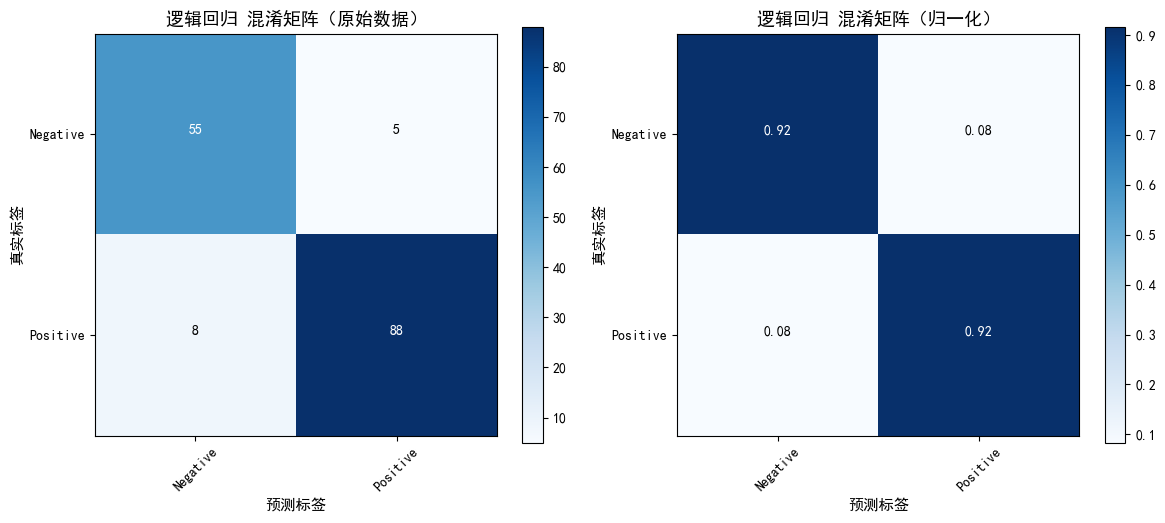

In [9]:
# 混淆矩阵可视化
cm = lr_metrics['confusion_matrix']
plt.figure(figsize=(12, 5))

# 子图1：原始混淆矩阵
plt.subplot(1, 2, 1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('逻辑回归 混淆矩阵（原始数据）', fontsize=13, fontweight='bold')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Negative', 'Positive'], rotation=45)
plt.yticks(tick_marks, ['Negative', 'Positive'])

# 在混淆矩阵中添加数值
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontweight='bold')

plt.ylabel('真实标签', fontsize=11)
plt.xlabel('预测标签', fontsize=11)

# 子图2：归一化混淆矩阵
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.subplot(1, 2, 2)
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('逻辑回归 混淆矩阵（归一化）', fontsize=13, fontweight='bold')
plt.colorbar()
plt.xticks(tick_marks, ['Negative', 'Positive'], rotation=45)
plt.yticks(tick_marks, ['Negative', 'Positive'])

# 在归一化混淆矩阵中添加数值
for i in range(cm_normalized.shape[0]):
    for j in range(cm_normalized.shape[1]):
        plt.text(j, i, format(cm_normalized[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm_normalized[i, j] > 0.5 else "black",
                 fontweight='bold')

plt.ylabel('真实标签', fontsize=11)
plt.xlabel('预测标签', fontsize=11)
plt.tight_layout()
plt.show()


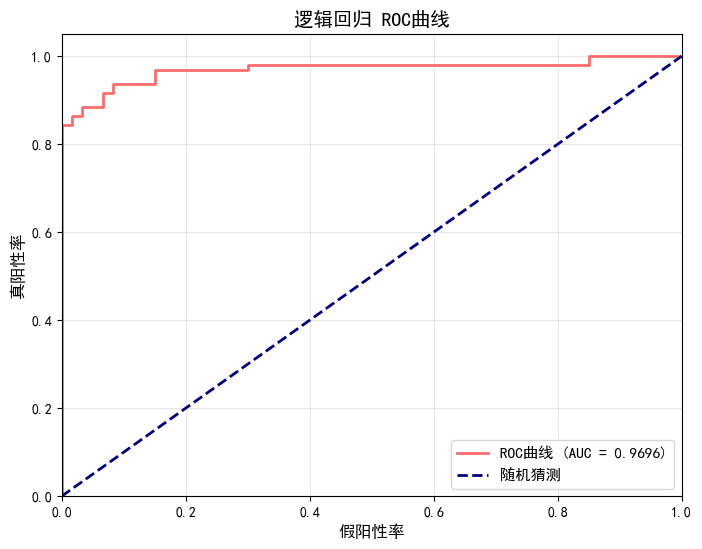

In [10]:
# ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, lr_model.y_pred_proba)
roc_auc = lr_metrics['roc_auc']

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#ff6b6b', lw=2, label=f'ROC曲线 (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='随机猜测')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假阳性率', fontsize=12)
plt.ylabel('真阳性率', fontsize=12)
plt.title('逻辑回归 ROC曲线', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.show()


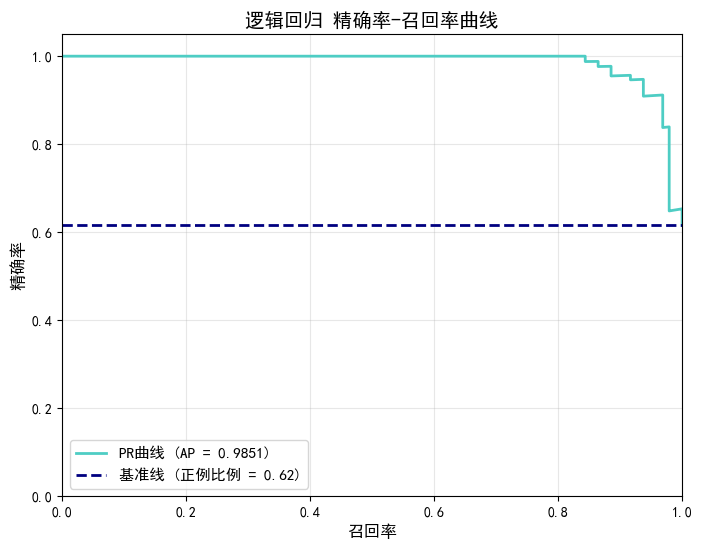

In [11]:
# 精确率-召回率（PR）曲线
precision, recall, _ = precision_recall_curve(y_test, lr_model.y_pred_proba)
avg_precision = lr_metrics['average_precision']

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='#4ecdc4', lw=2, label=f'PR曲线 (AP = {avg_precision:.4f})')
# 添加基准线（正例比例）
pos_ratio = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [pos_ratio, pos_ratio], color='navy', lw=2, linestyle='--', 
         label=f'基准线 (正例比例 = {pos_ratio:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('召回率', fontsize=12)
plt.ylabel('精确率', fontsize=12)
plt.title('逻辑回归 精确率-召回率曲线', fontsize=14, fontweight='bold')
plt.legend(loc="lower left", fontsize=11)
plt.grid(alpha=0.3)
plt.show()


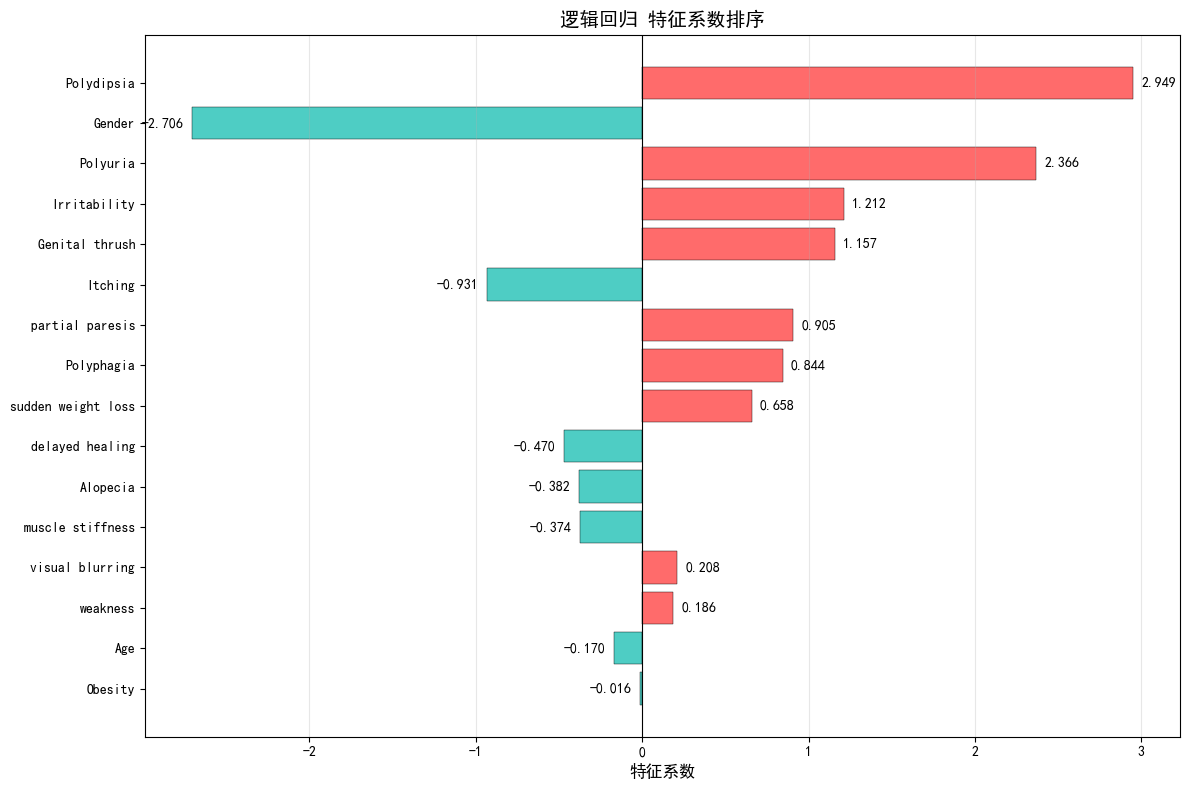

In [12]:
# 逻辑回归特征系数可视化
plt.figure(figsize=(12, 8))
# 按系数绝对值排序
lr_coefficients['abs_coefficient'] = lr_coefficients['coefficient'].abs()
lr_coefficients_sorted = lr_coefficients.sort_values('abs_coefficient', ascending=True)

colors = ['#ff6b6b' if x > 0 else '#4ecdc4' for x in lr_coefficients_sorted['coefficient']]
bars = plt.barh(range(len(lr_coefficients_sorted)), lr_coefficients_sorted['coefficient'], 
                color=colors, edgecolor='black', linewidth=0.3)
plt.yticks(range(len(lr_coefficients_sorted)), lr_coefficients_sorted['feature'], fontsize=10)
plt.xlabel('特征系数', fontsize=12)
plt.title('逻辑回归 特征系数排序', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)

# 添加系数数值标签
for i, (bar, val) in enumerate(zip(bars, lr_coefficients_sorted['coefficient'])):
    plt.text(val + 0.05 if val > 0 else val - 0.05, bar.get_y() + bar.get_height()/2,
             f'{val:.3f}', ha='left' if val > 0 else 'right', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [13]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
class RandomForestModel:
    """随机森林模型类，包含模型训练、调参和评估"""
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.model = RandomForestClassifier(random_state=random_state)
        self.best_model = None
        self.best_params = None
        self.cv_results = None
        self.y_pred = None
        self.y_pred_proba = None
        self.feature_importance = None
    
    def hyperparameter_tuning(self, X_train, y_train, cv=5):
        """网格搜索调参"""
        try:
            # 定义参数网格
            param_grid = {
                'n_estimators': [50, 100, 200, 300],  # 决策树数量
                'max_depth': [None, 5, 10, 15, 20],  # 决策树最大深度
                'min_samples_split': [2, 5, 10],  # 分裂节点所需最小样本数
                'min_samples_leaf': [1, 2, 4],  # 叶节点最小样本数
                'max_features': ['sqrt', 'log2', None]  # 每棵树使用的特征数
            }
            print(f"参数网格大小：{len(param_grid['n_estimators'])*len(param_grid['max_depth'])*len(param_grid['min_samples_split'])*len(param_grid['min_samples_leaf'])*len(param_grid['max_features'])}组参数")
            # 网格搜索
            grid_search = GridSearchCV(
                estimator=self.model,
                param_grid=param_grid,
                cv=cv,
                scoring=['accuracy', 'f1', 'roc_auc'],
                refit='accuracy',  # 以准确率为基准选择最佳模型
                n_jobs=-1,
                verbose=1
            )
            grid_search.fit(X_train, y_train)
            # 保存最佳模型和结果
            self.best_model = grid_search.best_estimator_
            self.best_params = grid_search.best_params_
            self.cv_results = pd.DataFrame(grid_search.cv_results_)
            print(f"\n随机森林最佳参数：{self.best_params}")
            print(f"随机森林交叉验证最佳准确率：{grid_search.best_score_:.4f}")
            # 输出交叉验证的各项指标均值
            print("\n交叉验证各项指标均值：")
            for score in ['mean_test_accuracy', 'mean_test_f1', 'mean_test_roc_auc']:
                print(f"{score.replace('mean_test_', '')}: {grid_search.cv_results_[score][grid_search.best_index_]:.4f}")
            # 保存特征重要性
            self.feature_importance = pd.DataFrame({
                'feature': X_train.columns,
                'importance': self.best_model.feature_importances_
            }).sort_values('importance', ascending=False)
            return self.best_model
        except Exception as e:
            print(f"随机森林调参时出错：{str(e)}")
            raise
    
    def train(self, X_train, y_train, tune=True, cv=5):
        """训练模型"""
        if tune:
            return self.hyperparameter_tuning(X_train, y_train, cv=cv)
        else:
            self.model.fit(X_train, y_train)
            self.best_model = self.model
            self.feature_importance = pd.DataFrame({
                'feature': X_train.columns,
                'importance': self.model.feature_importances_
            }).sort_values('importance', ascending=False)
            print("随机森林模型训练完成")
            return self.best_model
    
    def predict(self, X_test):
        """模型预测"""
        try:
            if self.best_model is None:
                raise ValueError("模型尚未训练")
            self.y_pred = self.best_model.predict(X_test)
            self.y_pred_proba = self.best_model.predict_proba(X_test)[:, 1]  # 患病概率
            return self.y_pred, self.y_pred_proba
        except Exception as e:
            print(f"模型预测时出错：{str(e)}")
            raise
    
    def evaluate(self, X_test, y_test, save_results=True):
        """全面评估模型性能"""
        try:
            if self.best_model is None:
                raise ValueError("模型尚未训练")
            # 执行预测
            self.predict(X_test)
            
            # 计算各项评估指标
            metrics = {}
            metrics['accuracy'] = accuracy_score(y_test, self.y_pred)
            metrics['precision'] = precision_score(y_test, self.y_pred)
            metrics['recall'] = recall_score(y_test, self.y_pred)
            metrics['f1'] = f1_score(y_test, self.y_pred)
            metrics['f2'] = fbeta_score(y_test, self.y_pred, beta=2)  # 更重视召回率
            metrics['roc_auc'] = roc_auc_score(y_test, self.y_pred_proba)
            metrics['average_precision'] = average_precision_score(y_test, self.y_pred_proba)
            metrics['confusion_matrix'] = confusion_matrix(y_test, self.y_pred)
            
            # 输出详细评估结果
            print("\n随机森林模型测试集评估结果")
            print(f"准确率：{metrics['accuracy']:.4f}")
            print(f"精确率：{metrics['precision']:.4f}")
            print(f"召回率：{metrics['recall']:.4f}")
            print(f"F1分数：{metrics['f1']:.4f}")
            print(f"F2分数：{metrics['f2']:.4f}")
            print(f"ROC-AUC：{metrics['roc_auc']:.4f}")
            print(f"平均精确率：{metrics['average_precision']:.4f}")
            print("\n混淆矩阵：")
            print(metrics['confusion_matrix'])
            print("\n分类报告：")
            print(classification_report(y_test, self.y_pred, target_names=['Negative', 'Positive']))
            
            # 保存评估结果
            if save_results:
                self.evaluation_metrics = metrics
            return metrics
        except Exception as e:
            print(f"随机森林模型评估时出错：{str(e)}")
            raise
    
    def get_feature_importance(self, top_n=10):
        """获取特征重要性"""
        try:
            if self.feature_importance is None:
                raise ValueError("模型尚未训练或未计算特征重要性")
            print(f"\n随机森林Top{top_n}特征重要性：")
            top_features = self.feature_importance.head(top_n)
            print(top_features.round(3))
            return self.feature_importance
        except Exception as e:
            print(f"获取特征重要性时出错：{str(e)}")
            raise

# 实例化随机森林模型并训练
rf_model = RandomForestModel(random_state=42)
rf_best_model = rf_model.train(X_train_scaled, y_train, tune=True, cv=5)
rf_metrics = rf_model.evaluate(X_test_scaled, y_test)
rf_feature_importance = rf_model.get_feature_importance(top_n=16)

参数网格大小：540组参数
Fitting 5 folds for each of 540 candidates, totalling 2700 fits

随机森林最佳参数：{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
随机森林交叉验证最佳准确率：0.9698

交叉验证各项指标均值：
accuracy: 0.9698
f1: 0.9755
roc_auc: 0.9967

随机森林模型测试集评估结果
准确率：0.9872
精确率：0.9896
召回率：0.9896
F1分数：0.9896
F2分数：0.9896
ROC-AUC：0.9994
平均精确率：0.9996

混淆矩阵：
[[59  1]
 [ 1 95]]

分类报告：
              precision    recall  f1-score   support

    Negative       0.98      0.98      0.98        60
    Positive       0.99      0.99      0.99        96

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156


随机森林Top16特征重要性：
               feature  importance
2             Polyuria       0.205
3           Polydipsia       0.194
1               Gender       0.110
0                  Age       0.104
4   sudden weight loss       0.059
12     partial paresis       0.049


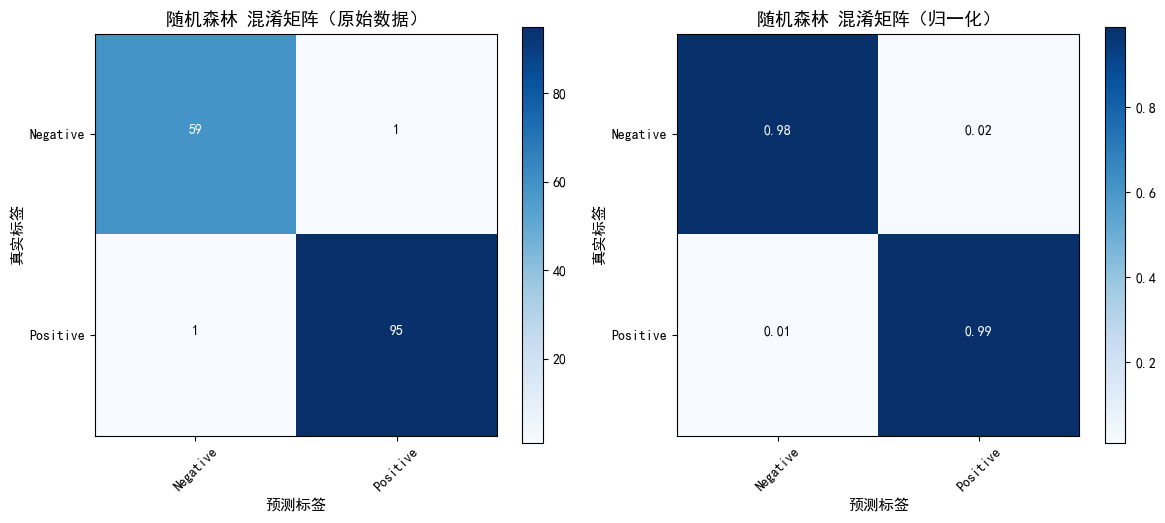

In [14]:
# 混淆矩阵可视化
cm = rf_metrics['confusion_matrix']
plt.figure(figsize=(12, 5))

# 子图1：原始混淆矩阵
plt.subplot(1, 2, 1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('随机森林 混淆矩阵（原始数据）', fontsize=13, fontweight='bold')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Negative', 'Positive'], rotation=45)
plt.yticks(tick_marks, ['Negative', 'Positive'])

# 在混淆矩阵中添加数值
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontweight='bold')

plt.ylabel('真实标签', fontsize=11)
plt.xlabel('预测标签', fontsize=11)

# 子图2：归一化混淆矩阵
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.subplot(1, 2, 2)
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('随机森林 混淆矩阵（归一化）', fontsize=13, fontweight='bold')
plt.colorbar()
plt.xticks(tick_marks, ['Negative', 'Positive'], rotation=45)
plt.yticks(tick_marks, ['Negative', 'Positive'])

# 在归一化混淆矩阵中添加数值
for i in range(cm_normalized.shape[0]):
    for j in range(cm_normalized.shape[1]):
        plt.text(j, i, format(cm_normalized[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm_normalized[i, j] > 0.5 else "black",
                 fontweight='bold')

plt.ylabel('真实标签', fontsize=11)
plt.xlabel('预测标签', fontsize=11)
plt.tight_layout()
plt.show()


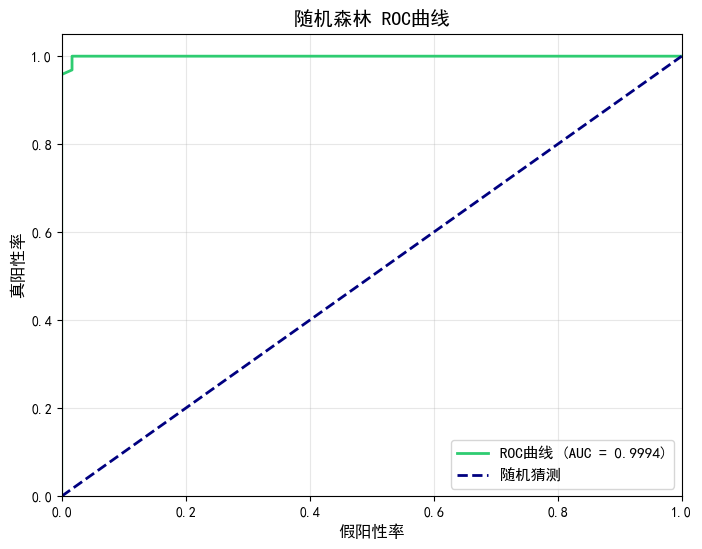

In [15]:
# ROC曲线
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.y_pred_proba)
roc_auc_rf = rf_metrics['roc_auc']

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='#2ecc71', lw=2, label=f'ROC曲线 (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='随机猜测')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假阳性率', fontsize=12)
plt.ylabel('真阳性率', fontsize=12)
plt.title('随机森林 ROC曲线', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.show()


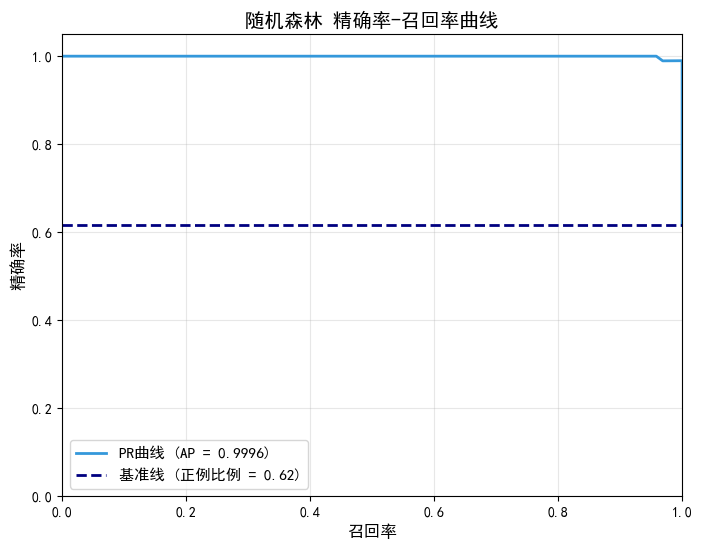

In [16]:
# PR曲线
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_model.y_pred_proba)
avg_precision_rf = rf_metrics['average_precision']

plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='#3498db', lw=2, label=f'PR曲线 (AP = {avg_precision_rf:.4f})')
# 添加基准线（正例比例）
pos_ratio = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [pos_ratio, pos_ratio], color='navy', lw=2, linestyle='--', 
         label=f'基准线 (正例比例 = {pos_ratio:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('召回率', fontsize=12)
plt.ylabel('精确率', fontsize=12)
plt.title('随机森林 精确率-召回率曲线', fontsize=14, fontweight='bold')
plt.legend(loc="lower left", fontsize=11)
plt.grid(alpha=0.3)
plt.show()

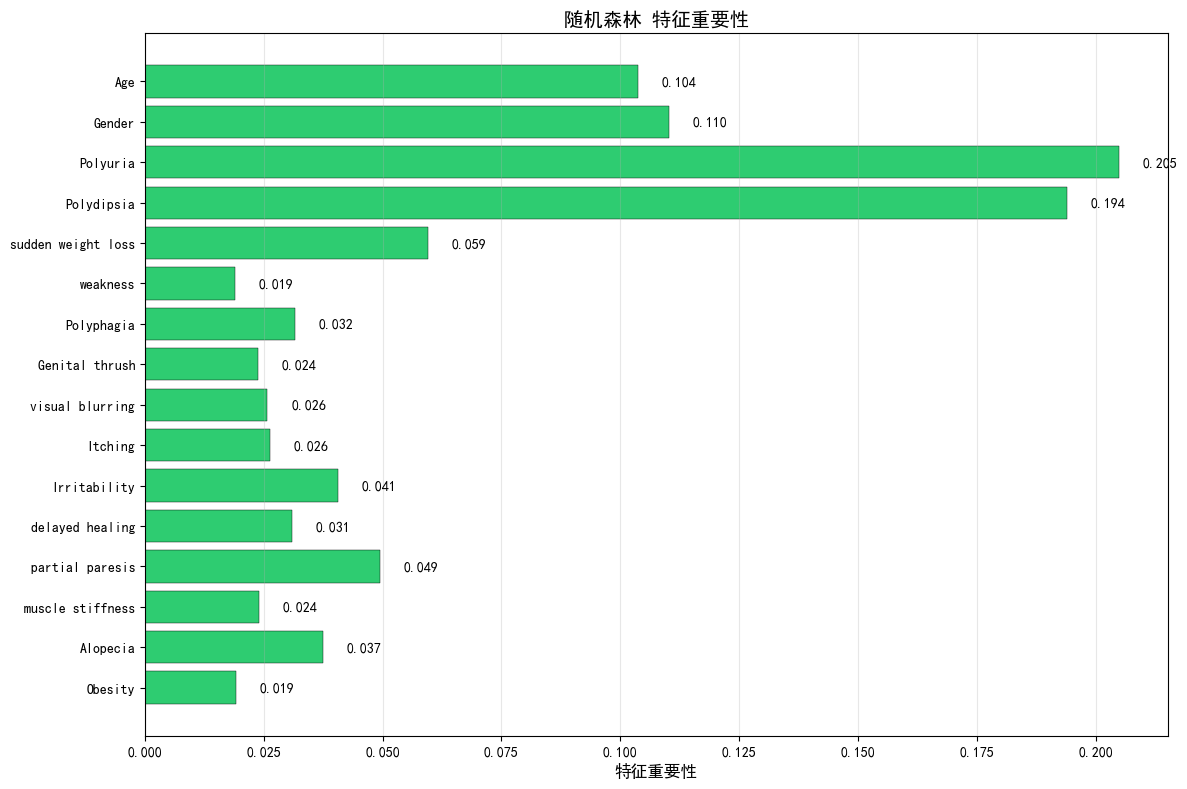

In [17]:
# 特征重要性可视化
plt.figure(figsize=(12, 8))
sorted_idx = rf_feature_importance['importance'].argsort()
plt.barh(range(len(sorted_idx)), rf_feature_importance['importance'][sorted_idx], 
         color='#2ecc71', edgecolor='black', linewidth=0.3)
plt.yticks(range(len(sorted_idx)), rf_feature_importance['feature'][sorted_idx], fontsize=10)
plt.xlabel('特征重要性', fontsize=12)
plt.title('随机森林 特征重要性', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# 添加重要性数值标签
for i, val in enumerate(rf_feature_importance['importance'][sorted_idx]):
    plt.text(val + 0.005, i, f'{val:.3f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

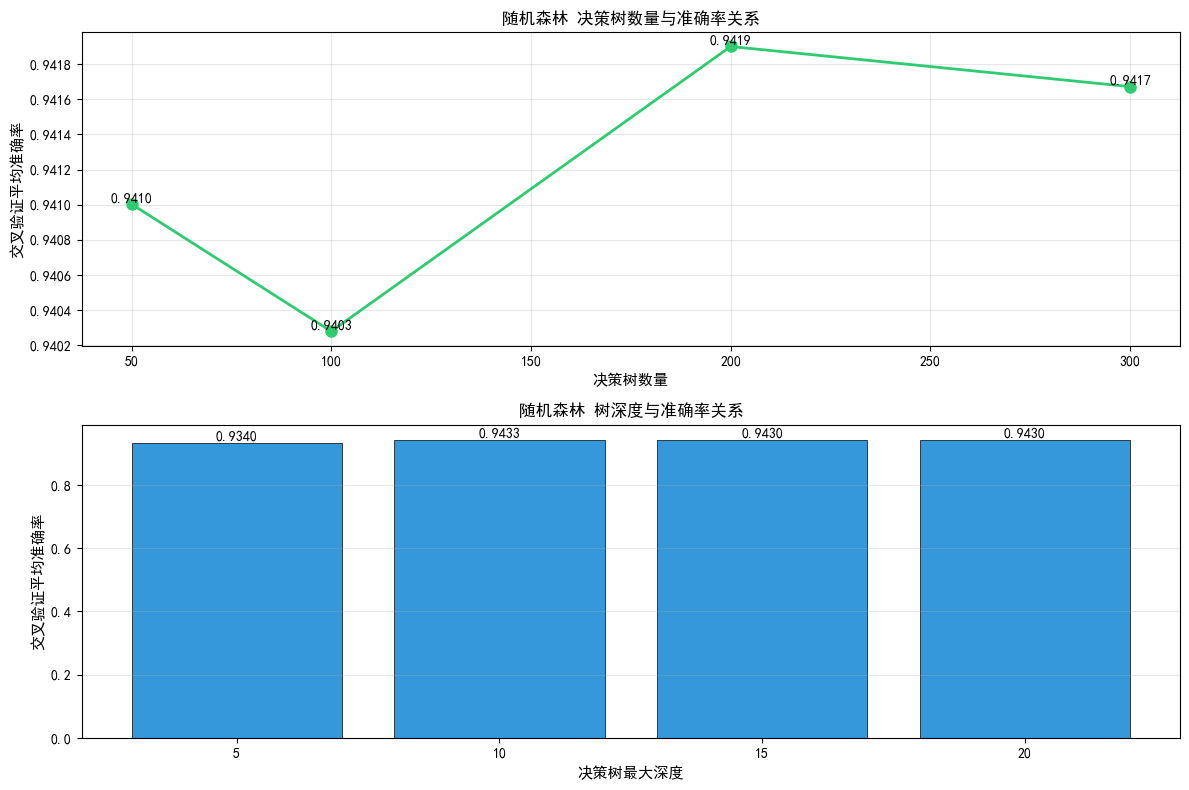

In [18]:
# 随机森林调参结果可视化

# 提取关键参数的调参结果
cv_results = rf_model.cv_results
# 按n_estimators分组计算平均准确率
n_estimators_groups = cv_results.groupby('param_n_estimators')['mean_test_accuracy'].mean().reset_index()
# 按max_depth分组计算平均准确率
max_depth_groups = cv_results.groupby('param_max_depth')['mean_test_accuracy'].mean().reset_index()

plt.figure(figsize=(12, 8))
# 子图1：n_estimators与准确率关系
plt.subplot(2, 1, 1)
plt.plot(n_estimators_groups['param_n_estimators'], n_estimators_groups['mean_test_accuracy'], 
         marker='o', linewidth=2, markersize=8, color='#2ecc71')
plt.xlabel('决策树数量', fontsize=11)
plt.ylabel('交叉验证平均准确率', fontsize=11)
plt.title('随机森林 决策树数量与准确率关系', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)
# 添加数值标签
for x, y in zip(n_estimators_groups['param_n_estimators'], n_estimators_groups['mean_test_accuracy']):
    plt.text(x, y , f'{y:.4f}', ha='center', va='bottom', fontweight='bold')

# 子图2：max_depth与准确率关系
plt.subplot(2, 1, 2)
# 处理None值为字符串以便绘图
max_depth_groups['param_max_depth'] = max_depth_groups['param_max_depth'].astype(str)
plt.bar(max_depth_groups['param_max_depth'], max_depth_groups['mean_test_accuracy'], 
        color='#3498db', edgecolor='black', linewidth=0.5)
plt.xlabel('决策树最大深度', fontsize=11)
plt.ylabel('交叉验证平均准确率', fontsize=11)
plt.title('随机森林 树深度与准确率关系', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
# 添加数值标签
for x, y in zip(max_depth_groups['param_max_depth'], max_depth_groups['mean_test_accuracy']):
    plt.text(x, y + 0.002, f'{y:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()